# Gradient descent for function with one variable


In this notebook, we will write gradient descent for single variable functions and also visualize how it works.


In [53]:
import numpy as np
import matplotlib.pyplot as plt

Let $f(x) = x^2 \cdot sin(x)$:

In [54]:
def f(x):
    return x**2 * np.sin(x)

derivative of the function above: $f'(x) = 2x\cdot sin(x) + x^2cos(x)$:

In [55]:
def f_dash(x):
    return 2*x*np.sin(x) + x**2*np.cos(x)

Visualize the function:


In [56]:
def draw_plot(f, x_begin, x_end):
    x_array = np.linspace(x_begin, x_end, 1000)
    plt.plot(x_array, f(x_array))

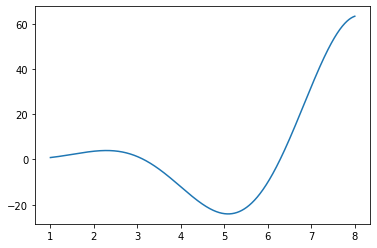

In [57]:
draw_plot(f, x_begin=1, x_end=8)

Now let's write the Gradient descent algorithm

Recall how the gradient optimization algorithm works:
1. Take a random point $х$ of the function $f$ and fix $\alpha$ and $\epsilon$
2. Calculate the derivative $f’(x)$
3. Move $x$: $x_{new} = x - \alpha⋅f’(x) $
4. Repeat again starting from point 2 until $\Delta y = y(x_{new}) - y(x)$ is less than $\epsilon$ modulo



Let's first write a function that makes 1 step of gradient descent (points 2-3 in the algorithm above)

In [58]:
def gradient_descent_step(f_dash, x, alpha=0.001):
    
    # calc the result of derivative function in certain point
    f_dash_x = f_dash(x)
    # calc the value delta x aplha * value of der. function
    delta_x = alpha*f_dash_x
    # make the step of gradient descent by giving to x a new value
    x_new = x - delta_x
    
    return x_new
    

In [59]:
gradient_descent_step(f_dash, 2, alpha=0.1)

1.8027397638885843

In [60]:
from IPython.display import clear_output

# function for visualizing our graph and movement 
# of the point of descent in exact moment
def draw_plot(f, x_begin, x_end, xs, ys):

    x_ = np.linspace(x_begin, x_end, 1000)
    plt.plot(x_, f(x_))

    plt.scatter(xs, ys)

    plt.annotate(' x = {}, y = {}'.format(round(xs[-1], 1), round(ys[-1], 1)), (xs[-1], ys[-1]))

    plt.title("f(x)")

    plt.show()

    clear_output(wait=True)

In [61]:
def gradient_descent(f, f_dash, x, alpha=0.001, epsilon=0.01):

    y = f(x)
    
    global xs, ys
    xs = [x]
    ys = [y]
    
    while True:
        x = gradient_descent_step(f_dash, x, alpha)

        y = f(x)

        previous_y = ys[-1]

        delta_y = np.abs(y - previous_y)
        

        xs.append(x)
        ys.append(y)
        

        print("current х: {}, current y: {}".format(x, y))
        print("difference between to last y: {}".format(delta_y))

        

        if delta_y < epsilon:
                break
        
    


Set the values ​​of $\alpha$ and $\epsilon$:


In [62]:
alpha = 0.005
epsilon = 0.001

And the initial value of the x coordinate, from which we will find the minimum using gradient descent:


In [63]:
x = 2.5

And run gradient descent:


In [64]:
gradient_descent(f, f_dash, x, alpha, epsilon)

current х: 2.5100739343832426, current y: 3.7196170000760804
difference between to last y: 0.0208339005736482
current х: 2.520681733760468, current y: 3.696511416743356
difference between to last y: 0.0231055833327245
current х: 2.53185643232316, current y: 3.6708644867919094
difference between to last y: 0.025646929951446573
current х: 2.543633503727008, current y: 3.642371418907018
difference between to last y: 0.028493067884891143
current х: 2.5560510682109636, current y: 3.610687294072976
difference between to last y: 0.03168412483404204
current х: 2.5691501178124967, current y: 3.57542130246692
difference between to last y: 0.03526599160605626
current х: 2.5829747608299023, current y: 3.5361300976751124
difference between to last y: 0.03929120479180748
current х: 2.597572486563042, current y: 3.492310130684152
difference between to last y: 0.043819966990960246
current х: 2.6129944511532224, current y: 3.4433888065872567
difference between to last y: 0.048921324096895535
current х:

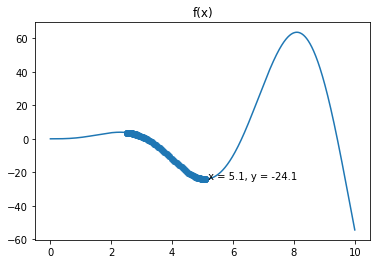

In [65]:
draw_plot(f, 0, 10, xs, ys)